In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv('product_sales.csv')

In [3]:
#Reviewing the types
sales.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [4]:
#reviewing the first 5 rows
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [5]:
#Using describe method to see outliers or inconsistent values
sales.describe()

#Removing outliers from years_as_customer column, since there were outliers.
Q1 = sales['years_as_customer'].quantile(0.25)
Q3 = sales['years_as_customer'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper= Q3 + (1.5 * IQR)
sales = sales[(sales['years_as_customer'] >= lower) & (sales['years_as_customer'] <= upper)]

In [6]:
#Reviewing the null values in the sales
sales.isna().any()

#Cleaning and validating revenue column
sales['revenue'].isna().sum() / len(sales) #To see the percentage of the null values.
sales['revenue'] = sales['revenue'].fillna(sales['revenue'].mean()) #Filling the null values with mean 


In [7]:
#Reviewing unique values for all columns
values_dict = {}
for column in sales.columns:
    values_dict[column] = sales[column].unique()

values_dict
#week, nb_sold, nb_site_visits and state columns are clean

{'week': array([2, 6, 5, 4, 3, 1]),
 'sales_method': array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
       dtype=object),
 'customer_id': array(['2e72d641-95ac-497b-bbf8-4861764a7097',
        '3998a98d-70f5-44f7-942e-789bb8ad2fe7',
        'd1de9884-8059-4065-b10f-86eef57e4a44', ...,
        '839653cb-68c9-48cb-a097-0a5a3b2b298b',
        'e4dad70a-b23b-407c-8bd3-e32ea00fae17',
        '4e077235-7c17-4054-9997-7a890336a214'], dtype=object),
 'nb_sold': array([10, 15, 11,  9, 13,  8, 12,  7, 14, 16]),
 'revenue': array([ 94.11426169, 225.47      ,  52.55      , ...,  44.34      ,
         45.01      ,  64.9       ]),
 'years_as_customer': array([ 0,  1,  6,  3, 10,  9,  7,  4,  2,  8,  5, 15, 14, 13, 12, 11, 16]),
 'nb_site_visits': array([24, 28, 26, 25, 22, 31, 23, 30, 27, 21, 32, 29, 20, 18, 19, 35, 16,
        17, 33, 36, 34, 15, 37, 14, 13, 12, 41]),
 'state': array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
        'Mississippi', 'Georgia', 'Oklahom

In [8]:
#Validating sales_method column since the values are inconsistent
sales['sales_method'] = sales['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

#customer_id column (lowering the letters in case there is a uppercase letter, also replacing ' ' with '-')
sales['customer_id'] = sales['customer_id'].astype(str)  
sales['customer_id'] = sales['customer_id'].str.lower()
sales['customer_id'] = sales['customer_id'].str.replace(' ', '-')

In [9]:
sales.shape

(14467, 8)

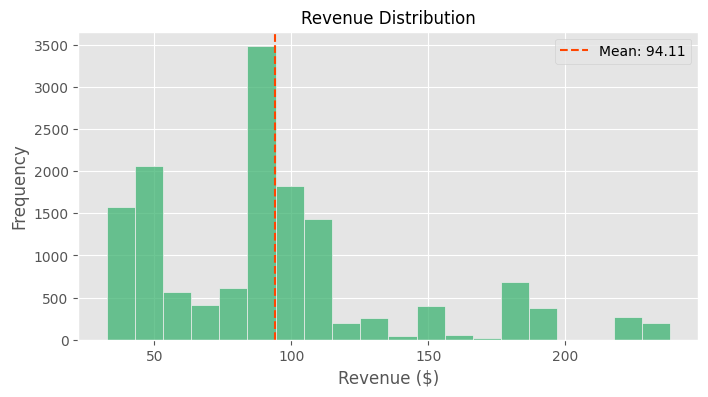

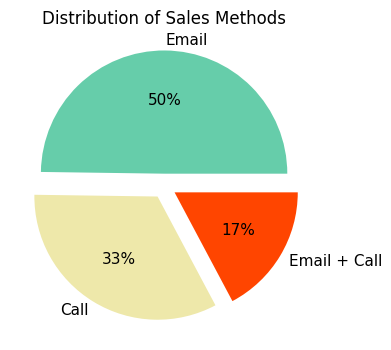

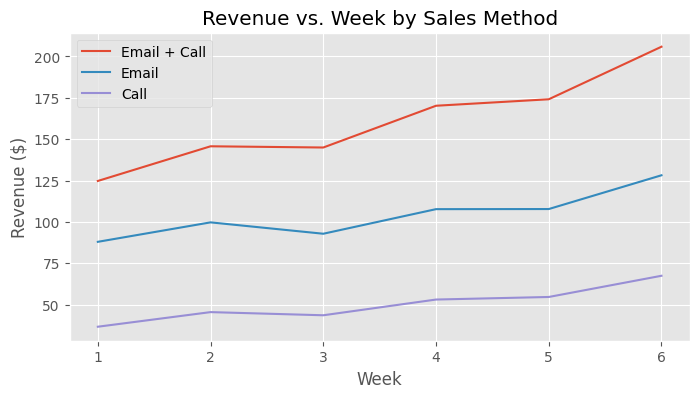

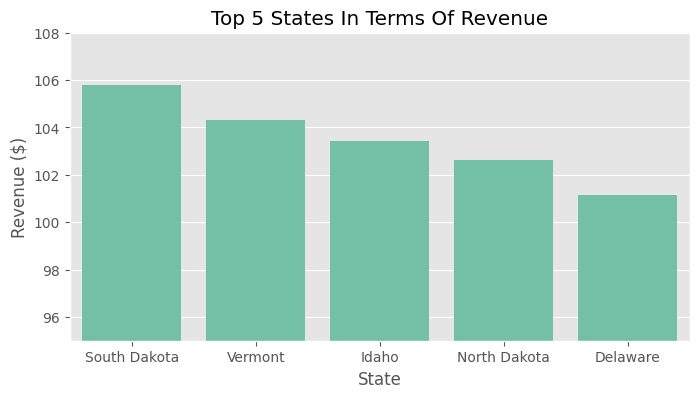

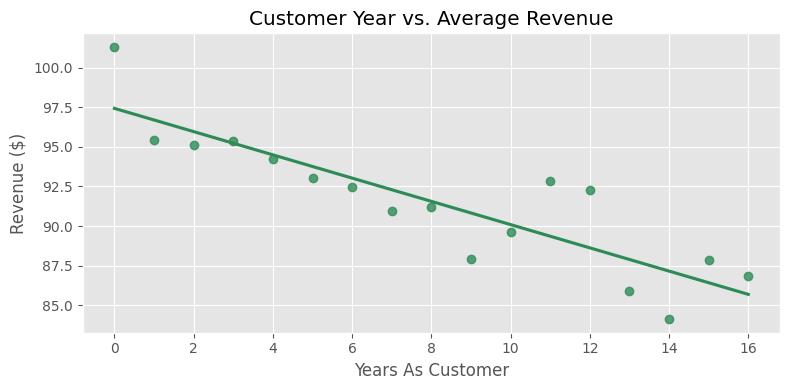

In [10]:
#Exploratory Analysis
plt.style.use('ggplot')

#Creating revenue dist. graphic and average revenue metric
fig1, ax1 = plt.subplots(figsize=(8,4))
sns.histplot(x = 'revenue', data= sales, bins=20, ax=ax1, color= 'mediumseagreen')
ax1.set_title('Revenue Distribution', fontsize=12)
ax1.set_xlabel('Revenue ($)')
ax1.set_ylabel('Frequency')

#Adding mean
mean_revenue = sales['revenue'].mean()
mean_revenue
ax1.axvline(mean_revenue, linestyle='--', linewidth= 1.5, color= 'orangered', label=f'Mean: {round(mean_revenue, 2)}')
ax1.legend()

#Observing frequency of sales methods, setting colors based on their frequency
method_count_df = sales['sales_method'].value_counts().reset_index()
method_count_df.columns = ['sales_method', 'count']

fig2, ax2 = plt.subplots(figsize=(8,4))
explode = [0.1, 0.1, 0.1]
colors= ['mediumaquamarine', 'palegoldenrod', 'orangered']
ax2.pie(x= method_count_df['count'], labels= method_count_df['sales_method'],explode=explode, autopct='%.0f%%', colors= colors, textprops={'fontsize': 11}, labeldistance=1.08)
ax2.set_title('Distribution of Sales Methods', fontsize=12)

#Seeing our performance per week by sales method.
fig3, ax3 = plt.subplots(figsize=(8,4))
sns.lineplot(x='week', y='revenue', ax=ax3, data=sales, color= 'goldenrod', hue='sales_method', hue_order=['Email + Call', 'Email', 'Call'], errorbar=None)
#Setting ci=None, I think it is easier to understand.
ax3.set_title('Revenue vs. Week by Sales Method')
ax3.set_xlabel('Week')
ax3.set_ylabel('Revenue ($)')
ax3.legend()

#Creating a df and barplot that contains states with highest average revenue to find customers to focus on. 
rbs = sales.groupby('state')['revenue'].mean().sort_values(ascending=False).reset_index()
filt = rbs['revenue'] > mean_revenue
rbs2 = rbs[filt].head()

fig4, ax4 = plt.subplots(figsize= (8,4))
sns.barplot(data= rbs2, x= rbs2['state'], y= rbs2['revenue'], ax=ax4, color='mediumaquamarine')
ax4.set_ylim([95,108])
ax4.set_title('Top 5 States In Terms Of Revenue')
ax4.set_xlabel('State')
ax4.set_ylabel('Revenue ($)')

#Calculating the correlation coefficent between years and revenue
yearsdf = sales.groupby('years_as_customer')['revenue'].mean().reset_index()
yearsdf['years_as_customer'].corr(yearsdf['revenue'])

#After seeing there is a significant negative correlation (-0.86), creating a regplot to compare two variables.
fig5, ax5 = plt.subplots(figsize= (8,4))
sns.regplot(data= yearsdf, x='years_as_customer', y='revenue',ax=ax5,color='seagreen', ci=None)
ax5.set_title('Customer Year vs. Average Revenue')
ax5.set_xlabel('Years As Customer')
ax5.set_ylabel('Revenue ($)')

plt.tight_layout()

#Saving the graphics
fig1.savefig('revenue_distribution.png')
fig2.savefig('method_distribution.png')
fig3.savefig('revenue_vs_week.png')
fig4.savefig('state_and_revenue.png')
fig5.savefig('year_vs_revenue.png')

Initial Revenue Per Customer: $94.11


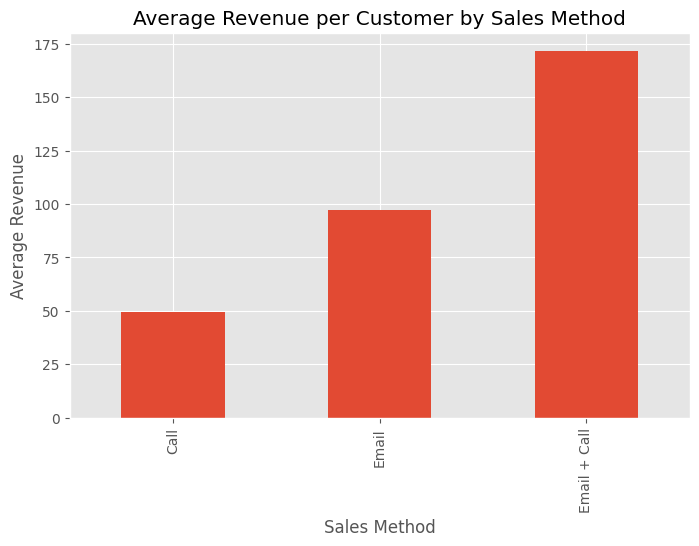

Initial Revenue Per Customer by Sales Method: $sales_method
Call             49.33
Email            96.99
Email + Call    171.64
Name: revenue, dtype: float64


In [11]:
#Definition of a metric for the business to monitor

average_revenue_per_customer = sales.groupby('customer_id')['revenue'].sum().mean()

print(f'Initial Revenue Per Customer: ${round(average_revenue_per_customer,2)}')

#By looking at the metric above, we can compare how we are doing in terms of revenue. We can also recognize customers who contribute significantly to revenue and developing marketing strategies for them.

average_revenue_per_salesmethod = sales.groupby('sales_method')['revenue'].mean()
average_revenue_per_salesmethod
plt.figure(figsize=(8,5))
average_revenue_per_salesmethod.plot(kind='bar', title='Average Revenue per Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue')
plt.show()

print(f'Initial Revenue Per Customer by Sales Method: ${round(average_revenue_per_salesmethod,2)}')

#This second metric is for doing more specific performance analysis. It is for seeing the effect of focusing to specific customers. We will compare this average values on monthly basis to see the effectiveness of our sales strategies.